In [1]:
import numpy as np
import npnn
from npnn.dataset import load_mnist, normalize
from sklearn.model_selection import train_test_split

np.random.seed(42) 

X,y, X_test,y_test = load_mnist()
X_norm = normalize(X)

X_train_norm,X_val,  y_train,y_val = train_test_split(X_norm,y, test_size=0.2, random_state=42)

X_test_norm = normalize(X_test)

In [14]:
from npnn.loss import CrossEntropyLoss
from npnn.optimizer import SGD
from npnn.model import FFN
from npnn.layers.activation import ReLU

np.random.seed(42)

model = FFN(784,10,[128,64,32,16],ReLU)
criterion = CrossEntropyLoss()
optimizer = SGD(model, lr=0.01, momentum=0.9)
epochs = 10
print("Model trainable parameters: ",model.count_params())

Model trainable parameters:  111514.0


In [15]:
np.random.seed(42)

batch_size = 32
train_accuracies = []
train_losses = []
val_losses = []
val_epoch_acc = []
for j in range(epochs):
        loss_epoch = 0.0
        loss_val = 0.0
        #preds = []
        for i in range(0,len(y_train),batch_size):
                # Training
                optimizer.zero_grad()

                image_batch = X_train_norm[i: i+batch_size].reshape(batch_size,-1)
                labels = y_train[i: i+batch_size]

                pred = model(image_batch)

                loss_epoch += criterion(pred,labels)
                dL_over = criterion.backward(pred)
                model.backward(dL_over)
                optimizer.step()
                 
                #preds += [pred]
                #labels_pred = np.argmax(pred, axis=1)
                #train_acc = np.mean(labels_pred == labels)
                #train_accuracies += [train_acc]

        epoch_acc = 0.0
        val_accuracies = []
        for k in range(0,len(y_val),batch_size):
                # Validation
                image_batch_val = X_val[k: k+batch_size].reshape(batch_size,-1)
                labels_val = y_val[k: k+batch_size]

                pred_val = model(image_batch_val)
                loss_val += criterion(pred_val,labels_val)

                labels_pred_val = np.argmax(pred_val, axis=1)
                val_acc = np.mean(labels_pred_val == labels_val)
                val_accuracies += [val_acc]

        # Loss/Accuracy per epoch
        val_losses += [loss_val/(len(y_val)/batch_size)]
        train_losses += [loss_epoch/(len(y_train)/batch_size)]
        epoch_acc = np.mean(val_accuracies)
        val_epoch_acc += [epoch_acc]

        print(f"Epoch {j+1} train_loss: {loss_epoch/(len(y_train)/batch_size):.4f}, val_loss: {loss_val/(len(y_val)/batch_size):.4f}, val_acc: {100*epoch_acc:.3f}%")
        

Epoch 1 train_loss: 0.9375, val_loss: 0.4759, val_acc: 85.950%
Epoch 2 train_loss: 0.3887, val_loss: 0.3477, val_acc: 89.892%
Epoch 3 train_loss: 0.3054, val_loss: 0.2893, val_acc: 91.767%
Epoch 4 train_loss: 0.2601, val_loss: 0.2534, val_acc: 92.692%
Epoch 5 train_loss: 0.2287, val_loss: 0.2292, val_acc: 93.325%
Epoch 6 train_loss: 0.2050, val_loss: 0.2119, val_acc: 93.858%
Epoch 7 train_loss: 0.1861, val_loss: 0.1993, val_acc: 94.150%
Epoch 8 train_loss: 0.1705, val_loss: 0.1902, val_acc: 94.408%
Epoch 9 train_loss: 0.1575, val_loss: 0.1814, val_acc: 94.667%
Epoch 10 train_loss: 0.1464, val_loss: 0.1764, val_acc: 94.750%


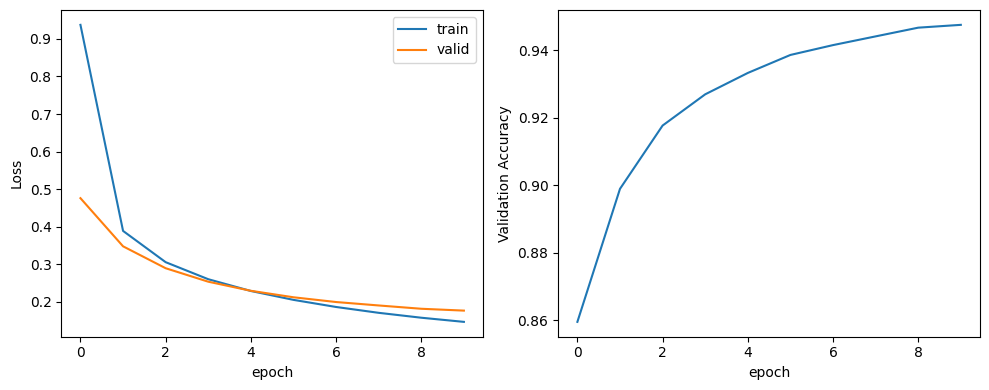

In [16]:
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))

ax1.plot(train_losses, label='train')
ax1.plot(val_losses, label='valid')
ax1.set_xlabel("epoch"); ax1.set_ylabel("Loss")
#ax1.title("ELBO during training"); 
ax1.legend()

ax2.plot(val_epoch_acc)
ax2.set_xlabel("epoch"); ax2.set_ylabel("Validation Accuracy")


plt.tight_layout()
plt.show()

In [17]:
batch_size = 100
test_accurracies = []

for i in range(0,len(y_test),batch_size):
    # Test
    image_batch = X_test_norm[i:i+batch_size].reshape(batch_size,-1)
    labels = y_test[i: i+batch_size]

    pred = model(image_batch)

    labels_pred = np.argmax(pred, axis=1)
    test_acc = np.mean(labels_pred == labels)
    test_accurracies += [test_acc]
    #print(f"Batch Accuracy {train_acc}")
    #full_acc += test_acc

# Test set Accuracy
full_acc = np.mean(test_accurracies)
print(f"Test Accuracy {full_acc*100:.2f}%")

# 10 epochs 95.19%

Test Accuracy 94.86%
